# Are the pulses valid in the RWA? 

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from notebook_utils import get_stage2_table, get_RWA_table, compare_RWA_prop

Make sure to have an iPython cluster running!

In [5]:
from IPython.parallel import Client
rc = Client()
lview = rc.load_balanced_view()

In [6]:
stage2_table = get_stage2_table('./runs')

In [7]:
def worker(rf):
    from notebook_utils import prop_RWA
    from os.path import join, isfile
    config_file = join(rf, 'config')
    pulse_json = join(rf, 'pulse_opt.json')
    if isfile(config_file) and isfile(pulse_json):
        prop_RWA(config_file, pulse_json, rf)

In [8]:
jobs = lview.map(worker, stage2_table.index)

In [38]:
print "progress: %.1f%% (%d/%d)" % (100.0*float(jobs.progress)/len(jobs), jobs.progress, len(jobs))

progress: 100.0% (1553/1553)


In [39]:
jobs.wait()

In [40]:
RWA_table = get_RWA_table('./runs')

./runs/w2_7500MHz_wc_8600MHz/stage2/SQ_1freq_random/U_RWA.dat is invalid
./runs/w2_7500MHz_wc_7600MHz/stage2/SQ_1freq_center/U_RWA.dat is invalid


In [49]:
combined_table = pd.concat([stage2_table, RWA_table], axis=1);
combined_table['Delta loss'] = np.abs(combined_table['loss'] - combined_table['loss (RWA)'])
combined_table['Delta C']   = np.abs(combined_table['C'] - combined_table['C (RWA)'])
combined_table = combined_table[combined_table['w2 [GHz]'] != combined_table['w1 [GHz]']]
#combined_table = combined_table[(combined_table['category']=='1freq_random') | (combined_table['category']=='1freq_center')]
#combined_table = combined_table[(combined_table['category']=='2freq_random') | (combined_table['category']=='2freq_resonant')]
combined_table = combined_table[(combined_table['category'] !='5freq_random') ]
combined_table = combined_table[(combined_table['loss'] < 0.1) ]
combined_table.drop(['w1 [GHz]', 'w2 [GHz]', 'wc [GHz]', 'J_PE', 'J_SQ', 'target'], axis=1, inplace=True)
combined_table.sort('Delta C', inplace=True, ascending=False)
pd.options.display.max_colwidth = 100
with open('combined_rwa_table.dat', 'w') as out_fh:
     out_fh.write(combined_table.to_string())

In [33]:
from QDYNTransmonLib.popdyn import PopPlot

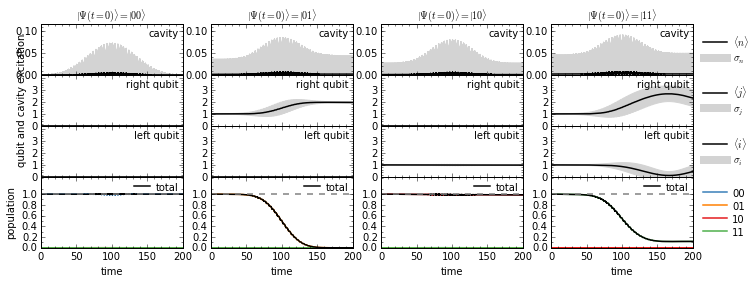

In [36]:
PopPlot('./check_RWA/w2_6620MHz_wc_8600MHz/LAB/').show()

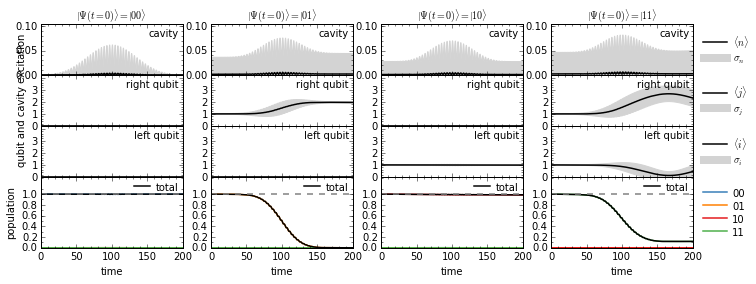

In [37]:
PopPlot('./check_RWA/w2_6620MHz_wc_8600MHz/RWA/').show()